A1. Evaluate Intraclass Spread and Interclass Distances

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv("Obesity.csv")


# Select relevant classes (modify based on your actual class names)
class1_data = data[data['NObeyesdad'] == 'Insufficient_Weight']
class2_data = data[data['NObeyesdad'] == 'Obesity_Type_I']

# Filter only numeric columns (exclude categorical columns like 'Gender', 'NObeyesdad', etc.)
numeric_columns = class1_data.select_dtypes(include=[np.number]).columns

class1_data = class1_data[numeric_columns].values
class2_data = class2_data[numeric_columns].values

# Function to calculate the mean of a class
def calculate_mean(class_data):
    return np.mean(class_data, axis=0)

# Function to calculate the spread (standard deviation) of a class
def calculate_spread(class_data):
    return np.std(class_data, axis=0)

# Function to calculate the Euclidean distance between two mean vectors
def calculate_distance(mean1, mean2):
    return np.linalg.norm(mean1 - mean2)

# Calculate mean, spread, and distance between class centroids
mean_class1 = calculate_mean(class1_data)
mean_class2 = calculate_mean(class2_data)

spread_class1 = calculate_spread(class1_data)
spread_class2 = calculate_spread(class2_data)

distance_between_classes = calculate_distance(mean_class1, mean_class2)

print(f"Mean Class 1: {mean_class1}")
print(f"Spread Class 1: {spread_class1}")
print(f"Mean Class 2: {mean_class2}")
print(f"Spread Class 2: {spread_class2}")
print(f"Distance between class centroids: {distance_between_classes}")


Mean Class 1: [19.78323715  1.69111711 49.90633037  2.48078837  2.91440325  1.871281
  1.25013133  0.83945906]
Spread Class 1: [2.664599   0.09950337 5.99964842 0.58372072 0.89960963 0.60118667
 0.85504871 0.64204768]
Mean Class 2: [25.88494073  1.69380389 92.87019836  2.1860499   2.43186166  2.11221845
  0.98674827  0.67674275]
Spread Class 2: [ 7.74464382  0.09827408 11.46961328  0.4313821   0.78834602  0.62375368
  0.89339927  0.6869164 ]
Distance between class centroids: 43.40044195632742


A2. Plot Histogram of a Feature

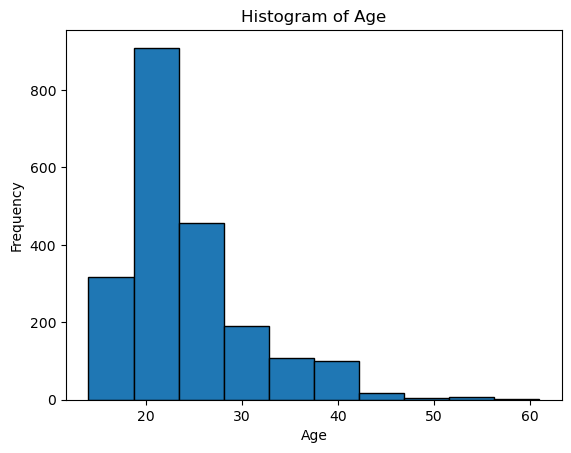

Mean of Age: 24.312599908574136
Variance of Age: 40.252236441907186


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Obesity.csv")

# Function to plot the histogram of a specific feature
def plot_histogram(data, feature_name):
    feature_data = data[feature_name]  # Correctly access the column using its name
    plt.hist(feature_data, bins=10, edgecolor='black')
    plt.title(f'Histogram of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()

# Example usage:
# Replace 'Age' with the actual column name you want to plot
plot_histogram(data, 'Age')

# Example for calculating mean and variance for a feature
mean = np.mean(data['Age'])
variance = np.var(data['Age'])

print(f"Mean of Age: {mean}")
print(f"Variance of Age: {variance}")


A3. Minkowski Distance

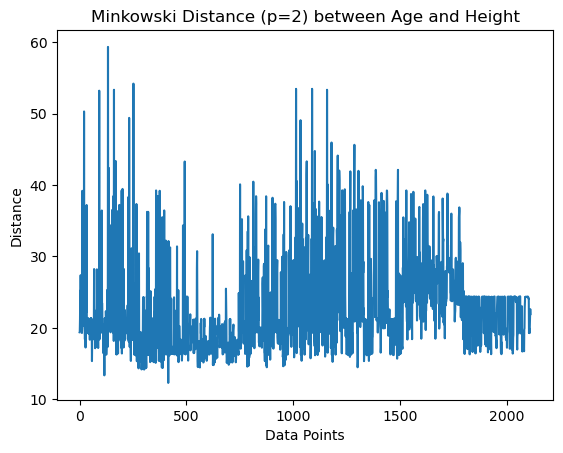

Minkowski Distance (r=1): 47731.657514000006
Minkowski Distance (r=2): 1079.0331382588465
Minkowski Distance (r=3): 314.13718904768126
Minkowski Distance (r=4): 173.56424010104413
Minkowski Distance (r=5): 123.93263099816193
Minkowski Distance (r=6): 100.51686131524768
Minkowski Distance (r=7): 87.570781214768
Minkowski Distance (r=8): 79.67748915544311
Minkowski Distance (r=9): 74.53887400794761
Minkowski Distance (r=10): 71.03219633105017


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Load the dataset
data = pd.read_csv("Obesity.csv")

# Function to calculate Minkowski distance
def minkowski_distance(x, y, p):
    return np.sum(np.abs(x - y) ** p) ** (1 / p)

# Function to plot Minkowski distance for two features
def plot_minkowski_distance(data, feature1_name, feature2_name, p=2):
    feature1 = data[feature1_name]  # Access the column by its name
    feature2 = data[feature2_name]  # Access the column by its name

    distances = []
    for i in range(len(feature1)):
        dist = minkowski_distance(np.array([feature1[i]]), np.array([feature2[i]]), p)
        distances.append(dist)

    plt.plot(distances)
    plt.title(f'Minkowski Distance (p={p}) between {feature1_name} and {feature2_name}')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

plot_minkowski_distance(data, 'Age', 'Height', p=2)

# Calculate Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = []

# Extract feature1 and feature2 again before this loop
feature1 = data['Age']  
feature2 = data['Height'] 

for r in r_values:
    dist = distance.minkowski(feature1, feature2, p=r)
    distances.append(dist)

# Print the results
for r, dist in zip(r_values, distances):
    print(f"Minkowski Distance (r={r}): {dist}")

A4. Split Dataset

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv("Obesity.csv")

# Select input features (X) and target output (y)
X = data[['Age',	'Gender',	'Height','Weight',	'CALC',	'FAVC',	'FCVC'	,'NCP',	'SCC',	'SMOKE',	'CH2O'	,'family_history_with_overweight',	'FAF',	'TUE',	'CAEC'	,'MTRANS']]  # Example of input features
y = data['NObeyesdad']  # Replace this with your target output column

# Split the dataset into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now X_train, X_test, y_train, and y_test are ready for use

# Display the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Display the size of the train and test datasets
print(f"Size of the training dataset: {len(X_train)} samples")
print(f"Size of the testing dataset: {len(X_test)} samples")

X_train shape: (1477, 16)
X_test shape: (634, 16)
y_train shape: (1477,)
y_test shape: (634,)
Size of the training dataset: 1477 samples
Size of the testing dataset: 634 samples


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
categorical_columns = ['CALC', 'SCC', 'CAEC']

# Initialize LabelEncoders for each categorical column
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

# Confirm all columns are now numeric
print(data.dtypes)


Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                                int32
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                 int32
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                                int32
MTRANS                             object
NObeyesdad                         object
dtype: object


A5. Train kNN Classifier

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load your dataset (assuming 'data' is already loaded as a DataFrame)
# data = pd.read_csv('your_dataset.csv')

# Select input features (X) and target output (y)
X = data[['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 
          'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS']]
y = data['NObeyesdad']  # Target output column

# Convert categorical features to dummy variables
X = pd.get_dummies(X)  # This converts categorical data to numeric

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train k-NN model
def train_knn(X_train, y_train, k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Example usage:
knn_model = train_knn(X_train, y_train, k=3)

A6. Test Accuracy of kNN

In [7]:
# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8107255520504731


A7. Study Prediction Behavior

In [8]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.72      0.91      0.80        86
      Normal_Weight       0.66      0.51      0.57        93
     Obesity_Type_I       0.81      0.82      0.82       102
    Obesity_Type_II       0.89      0.94      0.92        88
   Obesity_Type_III       0.98      0.99      0.98        98
 Overweight_Level_I       0.80      0.72      0.75        88
Overweight_Level_II       0.78      0.78      0.78        79

           accuracy                           0.81       634
          macro avg       0.81      0.81      0.80       634
       weighted avg       0.81      0.81      0.81       634



A8. Vary k in kNN and Plot Accuracy

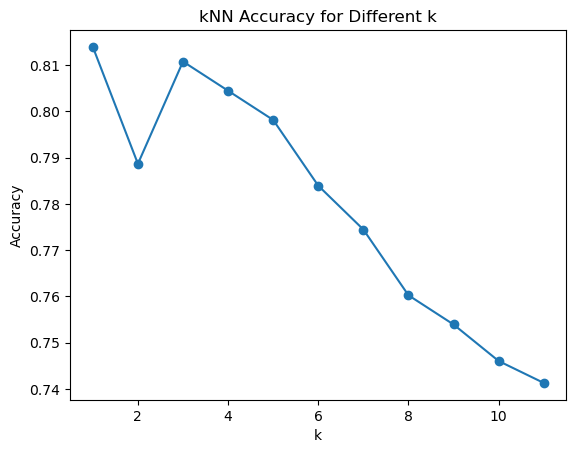

In [9]:
def vary_k_and_plot(X_train, X_test, y_train, y_test, max_k=11):
    accuracies = []
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        accuracy = knn.score(X_test, y_test)
        accuracies.append(accuracy)
    
    plt.plot(range(1, max_k + 1), accuracies, marker='o')
    plt.title('kNN Accuracy for Different k')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.show()

# Example usage:
vary_k_and_plot(X_train, X_test, y_train, y_test)


A9. Confusion Matrix and Performance Metrics

Confusion Matrix for Training Set:
[[175   9   0   0   0   1   1]
 [ 27 141   5   3   0   9   9]
 [  3   9 235   0   0   1   1]
 [  0   2   4 201   0   1   1]
 [  0   0   0   1 224   1   0]
 [  4  19  12   0   0 161   6]
 [  5  11   6   2   1   1 185]]
Confusion Matrix for Test Set:
[[78  4  0  0  0  3  1]
 [18 47  9  2  1  6 10]
 [ 2  3 84  6  0  3  4]
 [ 0  1  3 83  0  0  1]
 [ 0  0  0  1 97  0  0]
 [ 6 12  4  1  0 63  2]
 [ 4  4  4  0  1  4 62]]


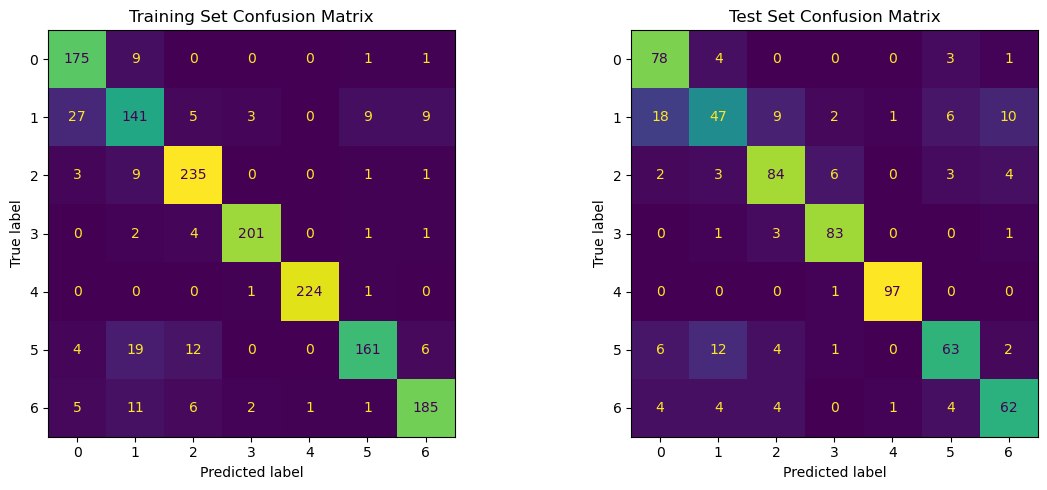

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train k-NN model
def train_knn(X_train, y_train, k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Example usage:
knn_model = train_knn(X_train, y_train, k=3)

# Predict on training and test sets
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Compute confusion matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display confusion matrices
print("Confusion Matrix for Training Set:")
print(train_conf_matrix)

print("Confusion Matrix for Test Set:")
print(test_conf_matrix)

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix).plot(ax=ax[0], colorbar=False)
ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix).plot(ax=ax[1], colorbar=False)

ax[0].set_title('Training Set Confusion Matrix')
ax[1].set_title('Test Set Confusion Matrix')

plt.tight_layout()
plt.show()
